#                                INVESTMENT ANALYSIS ASSIGNMENT


###### Submitted By: Mudassar Dildar Majgaonkar

# Checkpoint 1: Data Cleaning 1

In [1]:
#Just to display all o/p instead of last o/p
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

1. Load the companies and rounds data into two data frames and name them companies and rounds2 respectively.

In [3]:
#Import necessary libraries
import numpy as np
import pandas as pd
import re

In [4]:
#Create companies dataframe
companies = pd.read_csv("companies.txt",sep="\t",encoding='ISO-8859-1')

In [5]:
#Display Data in companies to verify if loaded properly
companies.head()
companies.describe()

#Check if any null values are populated
companies.isnull().sum()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66102,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Transparentrees,Spire,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [6]:
#Create rounds2 dataframe
rounds2 = pd.read_csv('rounds2.csv',sep=',',encoding='ISO-8859-1')

In [7]:
#Display Data in rounds2 to verify
rounds2.head()
rounds2.describe()

#Check for null values
rounds2.isnull().sum()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


,raised_amount_usd
count,9.495900e+04
mean,1.042687e+07
std,1.148212e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680511e+06
75%,7.000000e+06
max,2.127194e+10


company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

### Table 1.1: Understand the Data Set 

1) How many unique companies are present in rounds2?

In [8]:
#Non-unique entries in column
len(rounds2.company_permalink)

#Unique entries in column
len(rounds2.company_permalink.unique())

114949

90247

This seems wrong since even the duplicates are counted. 
e.g: Check the Organization name: /ORGANIZATION/0NDINE-BIOMEDICAL-INC and /organization/0ndine-biomedical-inc even though they both are same they are counted as different since they belong to different cases (UPPER and lower). We will need to refine our data more.

Will perform cleanup operations again on the extracted data to streamline the data.
Remove all the symbols and convert all the names to lower case so that its better for comparison.

### Cleaning the extracted data again #######

###### Clean companies data first

In [9]:
#Display the companies data before cleanup
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [10]:
#Delete all the non-ascii characters from the dataframe
#Ref:https://stackoverflow.com/questions/45871731/removing-special-characters-in-a-pandas-dataframe/45871775#45871775

companies['permalink']=companies[['permalink']].applymap(lambda x: x.encode('utf-8').decode('ascii', 'ignore'))
companies['name']=companies.name.str.encode('utf-8').str.decode('ascii', 'ignore')

#Convert the data to lower case
companies.permalink = companies.permalink.apply(lambda x: x.lower())
companies['name']=companies['name'].str.lower()

In [11]:
#Verify the data
companies.head()
companies.describe()
companies.isnull().sum()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66037,61191,27296,4,137,311,1092,5111,3978
top,/organization/qualilife,blink,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

There is one null value in the "name" column. The name of the company can be derived from its parent organization/permalink.
Use that to populate the null values in "name" column.

In [12]:
#Find the null value row in order to pouplate the data later
companies[companies['name'].isnull()]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
56916,/organization/tell-it-in,NaN,http://tellitin10.com,Startups,closed,USA,OR,"Portland, Oregon",Portland,01-10-2011


So Organization tell-it-in from Portland,Oregon,USA has "name" populated as null. We will derive the name from parent organization and fill up the null values.

In [13]:
#Split the string at / and - and use the name to populate the null value.
companies.loc[companies['permalink']=='/organization/tell-it-in',['name']]=' '.join(companies[companies['permalink']=='/organization/tell-it-in']['permalink'].str.split('/').tolist()[0][2].split('-'))

#check if value is populated correctly
companies.loc[companies['permalink']=='/organization/tell-it-in',]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
56916,/organization/tell-it-in,tell it in,http://tellitin10.com,Startups,closed,USA,OR,"Portland, Oregon",Portland,01-10-2011


In [14]:
#Now check the status of dataframe again. Name column shouldnt display any null values
companies.isnull().sum()

permalink            0
name                 0
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

###### Now clean the rounds data

In [15]:
#Data is rounds before cleanup
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [16]:
#Remove the non-ascii characters as done before
rounds2['company_permalink']=rounds2[['company_permalink']].applymap(lambda x: x.encode('utf-8').decode('ascii', 'ignore'))
rounds2['funding_round_permalink']=rounds2[['funding_round_permalink']].applymap(lambda x: x.encode('utf-8').decode('ascii', 'ignore'))

#Convert all the values to lower case for correct comparison
rounds2.company_permalink = rounds2.company_permalink.apply(lambda x: x.lower())

In [17]:
#verify the data. Check for null values
rounds2.head()
rounds2.isnull().sum()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

Now get back to the queries since now the data is pretty much cleaned up.

### Table 1.1: Understand the Data Set

1) How many unique companies are present in rounds2?

In [18]:
#Unique entries in company_permalink
len(rounds2.company_permalink.unique())

66368

The original answer without cleaning the data was 90247 see In[22] but after cleaning the data it is 66368

2) How many unique companies are present in companies?


In [19]:
#Unique entries in companies name
len(companies.name.unique())

66038

3) In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.

Ans: permalink - since there are no duplicates values (check the count of unique values against count of actual values in column if they are same that means there are no duplicates and ideal candidate for unique/primary key. Here only 2 columns can be used as keys - permalink and name. permalink has unique values)


In [20]:
len(companies.permalink.unique()) == len(companies.permalink)

len(companies.name.unique()) == len(companies.name)

True

False

4) Are there any companies in the rounds2 file which are not present in companies?

Ans: No. 

All the companies mentioned in rounds2 are present in companies. A simple join can be used to check this. Check the shape of rounds2 and then shape of companies. rounds2 has 114949 rows while companies has 66368. If the join of 2 displays more entries that means there is a entry in rounds2 that is not in companies. As observed below rounds2.shape = master_frame.shape.
Check output of In [80] below.

4) Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. 
How many observations are present in master_frame?

Ans: 114949

In [21]:
#Check the basic data shape
rounds2.shape
companies.shape

#merge the dataframes
master_frame = pd.merge(rounds2,companies, left_on="company_permalink", right_on="permalink", how='left')

#verify the data
master_frame.shape
master_frame.head()

(114949, 6)

(66368, 10)

(114949, 16)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


# Checkpoint 2: Funding Type Analysis

1) Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity) 

Before calculating the actual investment value we need to clean the master_frame dataset. 
Check for any obvious null values. There are many companies in the master_frame dataset with status closed. Obviously considering those companies for actual prediction wont do any good since no investment will be done on them. So remove those companies from the list before analyzing.

In [22]:
#Check for null values
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           0
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [23]:
#Check the number of companies with status closed
closed_companies = master_frame[master_frame['status']=='closed']

closed_companies.head()

#Calculate the number of closed companies
len(closed_companies)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
65,/organization/10bestthings,/funding-round/35a58e17c5f6e25658a526fe9f6f8364,seed,NaN,01-04-2009,50000.0,/organization/10bestthings,10bestthings,http://10bestthings.com,Curated Web,closed,USA,OH,Cleveland,Cleveland,01-04-2009
81,/organization/11i-solutions,/funding-round/e07501ed6997290b1bef59406bc300a1,venture,NaN,22-03-2011,1800000.0,/organization/11i-solutions,11i solutions,http://www.11isolutions.com,Enterprise Software,closed,USA,AL,Huntsville,Huntsville,NaN
130,/organization/169-st,/funding-round/83b14cdf635963a5abc50cdafd9b462d,angel,NaN,01-06-2009,50000.0,/organization/169-st,169 st.,http://www.junebugreview.com,Entertainment|Games,closed,USA,FL,Orlando,Lake Mary,15-05-2009
146,/organization/180solutions,/funding-round/e55f5f2b9ee65826cc5bf2e1cc2eec9e,venture,A,05-04-2004,40000000.0,/organization/180solutions,180solutions,NaN,Advertising|Advertising Platforms|Promotional,closed,USA,WA,Seattle,Bellevue,NaN
151,/organization/1bib,/funding-round/db9507d458c110af3916ade1f6140e1a,venture,A,07-02-2008,NaN,/organization/1bib,1bib,http://www.1bib.com,Cars|Curated Web,closed,CHN,30,Guangzhou,Guangzhou,01-01-2006


8725

There are actually 8725 companies that are closed and are redundant to our analysis. So remove them.

In [24]:
#Create a backup copy just in case of the original master_frame
master_frame_backup=master_frame.copy()

In [25]:
#Only add those details of the companies which don't have status as closed
master_frame = master_frame[master_frame['status']!='closed']

master_frame.head()

len(master_frame)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


106224

There are also many companies which have raise no amount and are populated by null. We need to remove even these rows since this can affect the group functions like average/mean.

In [26]:
#Check the number of null values in raised_amount_usd
no_investment = master_frame[master_frame['raised_amount_usd'].isna()]

no_investment.head()

#Calculate the count
len(no_investment)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,/organization/004-technologies,004 technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
14,/organization/1,/funding-round/5de6d8828aef7d925d97918d15727670,undisclosed,NaN,05-02-2013,NaN,/organization/1,one inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011
17,/organization/1-4-all,/funding-round/e97a192e13ea0ee3c4f71136b4f3ec16,equity_crowdfunding,NaN,21-04-2013,NaN,/organization/1-4-all,1-4 all,NaN,Entertainment|Games|Software,operating,USA,NC,NC - Other,Connellys Springs,NaN
18,/organization/1-618-technology,/funding-round/83b8f4c7d37ecef5e001a5e953bf461a,equity_crowdfunding,NaN,22-01-2014,NaN,/organization/1-618-technology,1.618 technology,http://www.Homeandcondogallery.com,Networking|Real Estate|Web Hosting,operating,USA,FL,Orlando,Orlando,07-12-2013


18321

In [27]:
#remove the values with null values
master_frame=master_frame[master_frame['raised_amount_usd'].notna()]

master_frame.head()

len(master_frame)

master_frame.shape

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0,/organization/01games-technology,01games technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN


87903

(87903, 16)

In [28]:
#Convert the raised_amount to millions for easier analysis
#Added extra column since its mentioned in assignment we cant change the original data
master_frame['raised_amount_in_millions'] = master_frame['raised_amount_usd'].apply(lambda val: round(val/1000000,3))

master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,raised_amount_in_millions
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,10.000
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,0.700
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,3.407
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,2.000
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0,/organization/01games-technology,01games technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN,0.041


In [29]:
master_frame.isnull().sum()

company_permalink                0
funding_round_permalink          0
funding_round_type               0
funding_round_code           61716
funded_at                        0
raised_amount_usd                0
permalink                        0
name                             0
homepage_url                  3785
category_list                  633
status                           0
country_code                  4626
state_code                    6243
region                        5717
city                          5714
founded_at                   13910
raised_amount_in_millions        0
dtype: int64

Now since te data is in considerable shape lets start the analysis

###### 1) Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity) 

In [30]:
#Calculate the mean of all the funding type and sort it in ascending order
master_frame.groupby('funding_round_type',as_index=False)['raised_amount_in_millions'].mean().sort_values(by=['raised_amount_in_millions'],ascending=False)

,funding_round_type,raised_amount_in_millions
6,post_ipo_debt,174.609345
10,secondary_market,91.439808
7,post_ipo_equity,84.233854
8,private_equity,75.575805
12,undisclosed,18.837079
2,debt_financing,17.774072
13,venture,11.895604
4,grant,4.154310
1,convertible_note,1.479851
9,product_crowdfunding,1.411511


In [31]:
#Since the firm is looking for investment between 5 to 15 million dollars, we need to filter the results
master_frame.groupby('funding_round_type')['raised_amount_in_millions'].mean().between(5.0,15.0,inclusive=True)

funding_round_type
angel                    False
convertible_note         False
debt_financing           False
equity_crowdfunding      False
grant                    False
non_equity_assistance    False
post_ipo_debt            False
post_ipo_equity          False
private_equity           False
product_crowdfunding     False
secondary_market         False
seed                     False
undisclosed              False
venture                   True
Name: raised_amount_in_millions, dtype: bool

Based on above results "VENTURE" seems best option for investment

# Checkpoints - Part 2

### Checkpoint 3: Country Analysis

Get back to master_frame and see how the country values are looking?

In [32]:
master_frame.isnull().sum()

company_permalink                0
funding_round_permalink          0
funding_round_type               0
funding_round_code           61716
funded_at                        0
raised_amount_usd                0
permalink                        0
name                             0
homepage_url                  3785
category_list                  633
status                           0
country_code                  4626
state_code                    6243
region                        5717
city                          5714
founded_at                   13910
raised_amount_in_millions        0
dtype: int64

There are lots of null values in the country_code field. This needs to be taken care of before country analysis is done.

In [33]:
#Check the null values of the country code
no_country = master_frame[master_frame['country_code'].isna()]

no_country.head()

len(no_country)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,raised_amount_in_millions
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,3.407
32,/organization/1000chi,/funding-round/854fae13c5b26b2ea6b32b06c2e5890c,angel,NaN,01-04-2010,43923865.0,/organization/1000chi,beijing 1000chi software technology,http://www.1000chi.com/,Mobile,operating,NaN,NaN,NaN,NaN,01-01-2008,43.924
66,/organization/10k-2,/funding-round/95401c8e8336892bf375ad94efd6c725,seed,NaN,04-09-2015,100000.0,/organization/10k-2,beans around,http://beansaround.com/,Coffee|Delivery|Subscription Service,operating,NaN,NaN,NaN,NaN,01-04-2015,0.100
95,/organization/1234enter,/funding-round/6343322ed785252d4c5ada444fa7d8e4,venture,NaN,22-11-2013,150267.0,/organization/1234enter,1234enter,http://www.1234enter.com.br,Advertising|Analytics|Business Services|E-Comm...,operating,NaN,NaN,NaN,NaN,01-01-2012,0.150
96,/organization/1234enter,/funding-round/ee6f9dea78c9a0697a500098a854564d,seed,NaN,01-09-2012,500000.0,/organization/1234enter,1234enter,http://www.1234enter.com.br,Advertising|Analytics|Business Services|E-Comm...,operating,NaN,NaN,NaN,NaN,01-01-2012,0.500


4626

In [34]:
#remove the rows with null country_code and populate the values only where country_code is not null
master_frame = master_frame[master_frame['country_code'].notna()]

master_frame.head()

master_frame.category_list.isna().count()

master_frame.shape

len(master_frame[master_frame['country_code'].isna()])

len(master_frame.name.unique())

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,raised_amount_in_millions
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,10.000
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,0.700
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,2.000
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0,/organization/01games-technology,01games technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN,0.041
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0,/organization/0ndine-biomedical-inc,ondine biomedical inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,0.043


83277

(83277, 17)

0

45289

Now since the country_code null values are taken care of lets start the analysis

###### 1) Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)

Since investment type chosen is venture we will need only the data for the companies that have funding_round_type as venture.

In [35]:
#Take the backup of the actual master_frame
master_frame_backup1 = master_frame.copy()

In [36]:
#Now filter out the data based on funding type venture
master_frame = master_frame[master_frame['funding_round_type']=='venture']

master_frame.isna().sum()

len(master_frame)

company_permalink                0
funding_round_permalink          0
funding_round_type               0
funding_round_code           19874
funded_at                        0
raised_amount_usd                0
permalink                        0
name                             0
homepage_url                  1983
category_list                  201
status                           0
country_code                     0
state_code                     696
region                         549
city                           549
founded_at                    7506
raised_amount_in_millions        0
dtype: int64

44949

In [37]:
#Now we need the country wise analysis so group the data by country
master_frame.groupby('country_code')['raised_amount_in_millions'].sum()

country_code
ARE       342.618
ARG       304.290
ARM        26.518
AUS      1252.744
AUT       564.298
BAH         8.900
BEL      1017.139
BGD         7.002
BGR        11.300
BMU       288.800
BRA      1686.261
BWA         2.250
CAN      8825.477
CHE      2596.338
CHL        24.906
CHN     39101.773
CMR         0.360
COL       100.127
CYM        79.588
CYP        81.000
CZE       168.692
DEU      6061.141
DNK      1163.666
ECU         0.966
EGY       268.225
ESP      1613.062
EST        96.059
FIN      1009.939
FRA      6775.039
GBR     18241.345
          ...    
NLD      2882.530
NOR       878.357
NZL       423.881
PAK        83.100
PAN         2.100
PER         2.366
PHL       114.500
POL       120.652
PRI         0.250
PRT       129.340
ROM        16.407
RUS      1266.071
SAU         0.500
SEN         2.860
SGP      2739.135
SVK         8.241
SVN        12.018
SWE      3083.213
TAN        79.450
THA       103.550
TTO         8.500
TUN         3.920
TUR       559.097
TWN       623.9

In [38]:
#We need top 9 countries
master_frame.groupby('country_code',as_index=False)['raised_amount_in_millions'].sum().sort_values(by=['raised_amount_in_millions'],ascending=False).head(9)

,country_code,raised_amount_in_millions
94,USA,399935.179
15,CHN,39101.773
29,GBR,18241.345
39,IND,14050.604
12,CAN,8825.477
28,FRA,6775.039
42,ISR,6503.020
21,DEU,6061.141
45,JPN,3242.031


###### 2) For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)

In [39]:
top9 = master_frame.groupby('country_code',as_index=False)['raised_amount_in_millions'].sum().sort_values(by=['raised_amount_in_millions'],ascending=False).head(9)

#Add column Country_Rank to rank the countries
top9['country_rank'] = range(1,10)

#Also lets add a column of preferred businesslanguage to this dataframe
#Data sourced from internet for preferred business languages
top9['pref_business_language'] = ['ENGLISH','CHINESE','ENGLISH','ENGLISH','ENGLISH','FRENCH','HEBREW','DEUTSCH','JAPANESE']

top9

,country_code,raised_amount_in_millions,country_rank,pref_business_language
94,USA,399935.179,1,ENGLISH
15,CHN,39101.773,2,CHINESE
29,GBR,18241.345,3,ENGLISH
39,IND,14050.604,4,ENGLISH
12,CAN,8825.477,5,ENGLISH
28,FRA,6775.039,6,FRENCH
42,ISR,6503.020,7,HEBREW
21,DEU,6061.141,8,DEUTSCH
45,JPN,3242.031,9,JAPANESE


Based on the above results: . 
 1. Top English-speaking country is USA	              
 2. Second English-speaking country	is GBR 
 3. Third English-speaking country is IND 

# Checkpoint 4: Sector Analysis 1

In [40]:
#Read the mapping.csv file info for furthur analysis

mapping = pd.read_csv('mapping.csv')
mapping.head()

mapping.isnull().sum()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

###### 1) Extract the primary sector of each category list from the category_list column

In [41]:
#Extract the primary sector. Since the first string before the vertical bar will be considered the primary sector
#We split the string on | and use that as primary sector

primary_sector = master_frame['category_list'].str.split('|',n=1,expand=True)

#Check the details
master_frame.shape
primary_sector.shape

#We will just need first column so filter it
master_frame['primary_sector']=primary_sector[0]


# Analysied the mappings data frame. Found the Replacing 0 in the category list entries where it shuls
mapping['category_list']=mapping['category_list'].str.replace('0','na')

mapping.columns



(44949, 17)

(44949, 2)

Index(['category_list', 'Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')

Now add this extracted information to the original dataframe (master_frame)


###### 2) Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors)

In [42]:
#This can be done using melt function in pandas
#Reference: https://www.geeksforgeeks.org/python-pandas-melt/

primary_to_main = pd.melt(mapping, id_vars=['category_list'],value_vars=['Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'])

In [43]:
#We will need only those values where value = 1.
primary_to_main = primary_to_main[primary_to_main['value']==1]

primary_to_main

,category_list,variable,value
8,Adventure Travel,Automotive & Sports,1
14,Aerospace,Automotive & Sports,1
45,Auto,Automotive & Sports,1
46,Automated Kiosk,Automotive & Sports,1
47,Automotive,Automotive & Sports,1
57,Bicycles,Automotive & Sports,1
69,Boating Industry,Automotive & Sports,1
87,CAD,Automotive & Sports,1
93,Cars,Automotive & Sports,1
188,Design,Automotive & Sports,1


###### Final Mapping Result for Question 2 above

In [44]:
#Lets rename to the column names for ease of understanding and drop value column since its no more required for presentation
primary_to_main = primary_to_main.rename(columns={'category_list':'primary_sector','variable':'main_sector'})
primary_to_main = primary_to_main.drop('value',axis=1)

# Checkpoint 5: Sector Analysis 2

In [45]:
# Check for initial analysis before we move on furthur
primary_to_main.isnull().sum()
master_frame.isnull().sum()
primary_to_main.shape
master_frame.shape

primary_sector    1
main_sector       0
dtype: int64

company_permalink                0
funding_round_permalink          0
funding_round_type               0
funding_round_code           19874
funded_at                        0
raised_amount_usd                0
permalink                        0
name                             0
homepage_url                  1983
category_list                  201
status                           0
country_code                     0
state_code                     696
region                         549
city                           549
founded_at                    7506
raised_amount_in_millions        0
primary_sector                 201
dtype: int64

(688, 2)

(44949, 18)

In [46]:
#Merge the dataframes - master_frame and primary_to_main to get the consolidated information. Name it master_frame_pm
master_frame_pm = pd.merge(master_frame,primary_to_main,on='primary_sector',how='inner')

In [47]:
master_frame_pm.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,raised_amount_in_millions,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,10.0,Media,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,15.0,Media,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,5.8,Media,Entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.0,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,18.0,Media,Entertainment
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,/organization/all-def-digital,all def digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,5.0,Media,Entertainment


In [48]:
master_frame_pm.groupby('main_sector').main_sector.count()

main_sector
Automotive & Sports                          690
Blanks                                       201
Cleantech / Semiconductors                  9274
Entertainment                               2521
Health                                      3742
Manufacturing                               3075
News, Search and Messaging                  5483
Others                                     10680
Social, Finance, Analytics, Advertising     9107
Name: main_sector, dtype: int64

In [49]:
#As confirmed by TA on the discussion forum BLANKS is not required for analysis so removing it
master_frame_pm = master_frame_pm[master_frame_pm!='Blanks']

master_frame_pm.groupby('main_sector').main_sector.count()

main_sector
Automotive & Sports                          690
Cleantech / Semiconductors                  9274
Entertainment                               2521
Health                                      3742
Manufacturing                               3075
News, Search and Messaging                  5483
Others                                     10680
Social, Finance, Analytics, Advertising     9107
Name: main_sector, dtype: int64

###### The aim is to find out the most heavily invested main sectors in each of the three countries (for funding type FT and investments range of 5-15 M USD

In [50]:
#Create a dataframe with investments ranging from 5-15M
master_frame_invest5_15 = master_frame_pm[master_frame_pm['raised_amount_in_millions'].between(5.0,15.0,inclusive=True)]
master_frame_invest5_15.head()
master_frame_invest5_15.shape

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,raised_amount_in_millions,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,10.0,Media,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,15.0,Media,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,5.8,Media,Entertainment
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,/organization/all-def-digital,all def digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,5.0,Media,Entertainment
14,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5000000.0,/organization/chefs-feed,chefsfeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,5.0,Media,Entertainment


(14841, 19)

###### Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range. The three data frames should contain:

In [51]:
#Since funding type identified earlier as venture  lets filter that out just to be sure
master_frame_invest5_15 = master_frame_invest5_15[master_frame_invest5_15['funding_round_type']=='venture']
master_frame_invest5_15.shape

(14841, 19)

In [52]:
#Now 3 cities earlier identified are USA, GBR and IND. Create the dataframes D1, D2 and D3 accordingly
D1 = master_frame_invest5_15[master_frame_invest5_15['country_code']=='USA']
D2 = master_frame_invest5_15[master_frame_invest5_15['country_code']=='GBR']
D3 = master_frame_invest5_15[master_frame_invest5_15['country_code']=='IND']

D1.shape
D2.shape
D3.shape

(11326, 19)

(587, 19)

(317, 19)

In [53]:
#Now count the investment done based on main sector on D1
D1['investment_count']=D1.groupby('main_sector')['main_sector'].transform('count')
D1['investment_sum']=D1.groupby('main_sector')['raised_amount_in_millions'].transform('sum')

#Check for null values
master_frame_invest5_15[master_frame_invest5_15['main_sector'].isnull()]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,raised_amount_in_millions,primary_sector,main_sector
18044,/organization/123feng-com,/funding-round/9d83084d87dc63a309c9a6fe9bf59d1b,venture,A,27-10-2015,13000000.0,/organization/123feng-com,123feng.com,http://123feng.com/,NaN,operating,CHN,2,Hangzhou,Hangzhou,01-01-2014,13.000,NaN,NaN
18045,/organization/1mxians,/funding-round/6950448f81c6706abe61f659e15a7c87,venture,A,02-12-2015,15000000.0,/organization/1mxians,1mxians,http://www.1mxian.com/,NaN,operating,CHN,22,Beijing,Beijing,01-01-2014,15.000,NaN,NaN
18048,/organization/accelerator-corp,/funding-round/215f281607a54b9d5fc848b5c74ef9e7,venture,NaN,22-05-2003,15000000.0,/organization/accelerator-corp,accelerator corp.,http://www.acceleratorcorp.com,NaN,operating,USA,WA,Seattle,Seattle,01-01-2003,15.000,NaN,NaN
18050,/organization/accelerator-corp,/funding-round/d1341bc6df5065519b7b399ac9a67823,venture,NaN,19-11-2004,11800000.0,/organization/accelerator-corp,accelerator corp.,http://www.acceleratorcorp.com,NaN,operating,USA,WA,Seattle,Seattle,01-01-2003,11.800,NaN,NaN
18051,/organization/adaptive-media-3,/funding-round/62fe3848f9a2f28888cac0889f18f38f,venture,NaN,13-10-1999,15000000.0,/organization/adaptive-media-3,adaptive media,http://www.adaptivemedia.com/,NaN,operating,USA,CA,SF Bay Area,Sunnyvale,01-01-1999,15.000,NaN,NaN
18053,/organization/altela,/funding-round/b081fcbfc3ed22619250798744d259f1,venture,A,22-10-2007,7100000.0,/organization/altela,altela,http://altelainc.com/,NaN,operating,USA,NM,Albuquerque,Albuquerque,NaN,7.100,NaN,NaN
18055,/organization/apl-software,/funding-round/829db5718a04b580b0fcb1317a0d4457,venture,NaN,27-10-2015,5200000.0,/organization/apl-software,apl software,http://www.apl-soft.com/,NaN,operating,USA,CA,SF Bay Area,San Jose,NaN,5.200,NaN,NaN
18056,/organization/apr,/funding-round/9999be24b9422a2f523bf031cfea5e60,venture,NaN,05-05-2009,8776639.0,/organization/apr,apr,NaN,NaN,operating,USA,NJ,Newark,Upper Saddle River,NaN,8.777,NaN,NaN
18057,/organization/arroyo-optics,/funding-round/e053714e9cf47c0d0280cfdcf48b4961,venture,NaN,01-06-2001,8870000.0,/organization/arroyo-optics,arroyo optics,NaN,NaN,acquired,USA,CA,Los Angeles,Santa Monica,NaN,8.870,NaN,NaN
18060,/organization/avesta-technologies,/funding-round/82b6c1191c830b1044ed9e1fd6c38833,venture,D,13-10-1999,11500000.0,/organization/avesta-technologies,avesta technologies,http://www.avesta.com/,NaN,operating,USA,NY,New York City,New York,01-01-1996,11.500,NaN,NaN


In [54]:
#Now count the investment done based on main sector on D2
D2['investment_count']=D2.groupby('main_sector')['main_sector'].transform('count')
D2['investment_sum']=D2.groupby('main_sector')['raised_amount_in_millions'].transform('sum')
D2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,...,country_code,state_code,region,city,founded_at,raised_amount_in_millions,primary_sector,main_sector,investment_count,investment_sum
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,...,GBR,H9,London,London,01-01-2011,15.000,Media,Entertainment,53.0,463.516
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,...,GBR,H9,London,London,01-01-2011,5.800,Media,Entertainment,53.0,463.516
119,/organization/azimo,/funding-round/5eb768935cf9c60b402944b0f476baae,venture,A,11-03-2014,10000000.0,/organization/azimo,azimo,http://azimo.com,Curated Web|Finance Technology|Financial Servi...,...,GBR,H9,London,London,29-10-2012,10.000,Curated Web,"News, Search and Messaging",66.0,558.500
130,/organization/basekit-platform,/funding-round/8252cd70860ec66a1c7d13b6a2519dc6,venture,NaN,13-05-2014,7000000.0,/organization/basekit-platform,basekit,http://www.basekit.com,Curated Web|Internet|Web Design,...,GBR,H9,London,London,01-01-2008,7.000,Curated Web,"News, Search and Messaging",66.0,558.500
131,/organization/basekit-platform,/funding-round/9ceb098a822fb971db490b23c1067336,venture,NaN,03-02-2014,6818631.0,/organization/basekit-platform,basekit,http://www.basekit.com,Curated Web|Internet|Web Design,...,GBR,H9,London,London,01-01-2008,6.819,Curated Web,"News, Search and Messaging",66.0,558.500


In [55]:
#Now count the investment done based on main sector on D3
D3['investment_count']=D3.groupby('main_sector')['main_sector'].transform('count')
D3['investment_sum']=D3.groupby('main_sector')['raised_amount_in_millions'].transform('sum')
D3.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,...,country_code,state_code,region,city,founded_at,raised_amount_in_millions,primary_sector,main_sector,investment_count,investment_sum
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,...,IND,16,Mumbai,Mumbai,NaN,10.00,Media,Entertainment,32.0,272.080
121,/organization/babajob,/funding-round/b72eaac5ea12ac0f50573ac3d6d46b8d,venture,B,28-04-2015,10000000.0,/organization/babajob,babajob,http://www.babajob.com,Curated Web|Information Technology|Services|St...,...,IND,19,Bangalore,Bangalore,27-08-2007,10.00,Curated Web,"News, Search and Messaging",49.0,408.835
143,/organization/bharat-matrimony,/funding-round/e37673bc7b0f1dfd3782f8f7abdb9ec8,venture,B,05-02-2008,11750000.0,/organization/bharat-matrimony,bharat matrimony,http://www.bharatmatrimony.com,Curated Web|Match-Making,...,IND,25,Chennai,Chennai,12-03-1969,11.75,Curated Web,"News, Search and Messaging",49.0,408.835
165,/organization/bluestone-com,/funding-round/452a7fc1f34df2d3dcda4e28234bc671,venture,A,24-01-2012,5000000.0,/organization/bluestone-com,bluestone.com,http://bluestone.com,Curated Web,...,IND,19,Bangalore,Bangalore,01-01-2011,5.00,Curated Web,"News, Search and Messaging",49.0,408.835
167,/organization/bluestone-com,/funding-round/f5b252d6442ce231bb01586ca1821f63,venture,B,18-03-2014,10000000.0,/organization/bluestone-com,bluestone.com,http://bluestone.com,Curated Web,...,IND,19,Bangalore,Bangalore,01-01-2011,10.00,Curated Web,"News, Search and Messaging",49.0,408.835


### Table 5.1 : Sector-wise Investment Analysis

1) Total number of investments (count)

In [56]:
#Country 1 - Total number of investments
D1.shape[0]

11326

In [57]:
#Country 2 - Total number of investments
D2.shape[0]

587

In [58]:
#Country 3 - Total number of investments
D3.shape[0]

317

2) Total amount of investment (USD)

In [59]:
#Country 1 - Total amount of investment (USD)
D1.raised_amount_in_millions.sum()

101387.0

In [60]:
#Country 2 - Total amount of investment (USD)
D2.raised_amount_in_millions.sum()

5101.512

In [61]:
#Country 3 - Total amount of investment (USD)
D3.raised_amount_in_millions.sum()

2847.674

3) Top Sector name (no. of investment-wise)


In [62]:
#Country 1 - Top Sector name (no. of investment-wise)
D1_first_sector = D1.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(1)

D1_first_sector

D1_first_sector = D1_first_sector.index[0]

D1_first_sector

main_sector
Others    2765
Name: main_sector, dtype: int64

'Others'

In [63]:
#Country 2 - Top Sector name (no. of investment-wise)
D2_first_sector = D2.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(1)

D2_first_sector = D2_first_sector.index[0]

D2_first_sector

'Others'

In [64]:
#Country 3 - Top Sector name (no. of investment-wise)
D3_first_sector = D3.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(1)

D3_first_sector = D3_first_sector.index[0]

D3_first_sector

'Others'

4) Second Sector name (no. of investment-wise)

In [65]:
#Country 1 - Second Sector name (no. of investment-wise)
D1_second_sector = D1.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(2)

D1_second_sector

D1_second_sector = D1_second_sector.index[1]

D1_second_sector

main_sector
Others                                     2765
Social, Finance, Analytics, Advertising    2594
Name: main_sector, dtype: int64

'Social, Finance, Analytics, Advertising'

In [66]:
#Country 2 - Second Sector name (no. of investment-wise)
D2_second_sector = D2.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(2)

D2_second_sector = D2_second_sector.index[1]

D2_second_sector

'Social, Finance, Analytics, Advertising'

In [67]:
#Country 3 - Second Sector name (no. of investment-wise)
D3_second_sector = D3.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(2)

D3_second_sector= D3_second_sector.index[1]

D3_second_sector

'Social, Finance, Analytics, Advertising'

5) Third Sector name (no. of investment-wise)

In [68]:
#Country 1 - Third Sector name (no. of investment-wise)
D1_third_sector = D1.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3)

D1_third_sector = D1_third_sector.index[2]

D1_third_sector

'Cleantech / Semiconductors'

In [69]:
#Country 2 - Third Sector name (no. of investment-wise)
D2_third_sector = D2.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3)

D2_third_sector = D2_third_sector.index[2]

D2_third_sector

'Cleantech / Semiconductors'

In [70]:
#Country 3 - Third Sector name (no. of investment-wise)
D3_third_sector = D3.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3)

D3_third_sector = D3_third_sector.index[2]

D3_third_sector

'News, Search and Messaging'

In [71]:
#Country 1 - Number of investments in top sector
D1[D1['main_sector'] == D1_first_sector].shape[0]

2765

In [72]:
#Country 2 - Number of investments in top sector
D2[D2['main_sector'] == D2_first_sector].shape[0]

141

In [73]:
#Country 3 - Number of investments in top sector
D3[D3['main_sector'] == D3_first_sector].shape[0]

103

7) Number of investments in second best sector (refer point 4)

In [74]:
#Country 1 - Number of investments in second best sector 
D1[D1['main_sector'] == D1_second_sector].shape[0]

2594

In [75]:
#Country 2 - Number of investments in second best sector 
D2[D2['main_sector'] == D2_second_sector].shape[0]

128

In [76]:
#Country 3 - Number of investments in second best sector 
D3[D3['main_sector'] == D3_second_sector].shape[0]

59

8) Number of investments in third best sector (refer point 5)

In [77]:
#Country 1 - Number of investments in third best sector 
D1[D1['main_sector'] == D1_third_sector].shape[0]

2152

In [78]:
#Country 2 - Number of investments in third best sector 
D2[D2['main_sector'] == D2_third_sector].shape[0]

115

In [79]:
#Country 3 - Number of investments in third best sector 
D3[D3['main_sector'] == D3_third_sector].shape[0]

49

9) For the top sector count-wise (point 3), which company received the highest investment?

In [80]:
#Country 1 - For the top sector count-wise (point 3), which company received the highest investment
#Sort the values based on investment amount
D1_high_investment = D1[D1.main_sector == D1_first_sector].sort_values(by = 'raised_amount_in_millions', ascending = False)

#We need only top entry in this
D1_high_investment.head(1)

#We need only name
D1_high_investment.head(1)['name'].values[0]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,...,country_code,state_code,region,city,founded_at,raised_amount_in_millions,primary_sector,main_sector,investment_count,investment_sum
25301,/organization/udacity,/funding-round/ce5a787ab9302f30a8ecdb129b1da939,venture,B,25-10-2012,15000000.0,/organization/udacity,udacity,http://www.udacity.com,EdTech|Education,...,USA,CA,SF Bay Area,Mountain View,01-01-2011,15.0,EdTech,Others,2765.0,24691.7


'udacity'

In [81]:
#Country 2 - For the top sector count-wise (point 3), which company received the highest investment
#Sort the values based on investment amount
D2_high_investment = D2[D2.main_sector == D2_first_sector].sort_values(by = 'raised_amount_in_millions', ascending = False).head(1)['name'].values[0]

D2_high_investment

'tribold'

In [82]:
#Country 3 - For the top sector count-wise (point 3), which company received the highest investment
#Sort the values based on investment amount
D3_high_investment = D3[D3.main_sector == D3_first_sector].sort_values(by = 'raised_amount_in_millions', ascending = False).head(1)['name'].values[0]

D3_high_investment

'k-12 techno services'

10) For point 4 (second best sector count-wise), which company received the highest investment?

In [83]:
#Country 1 - second best sector count-wise with  highest investment
#Sort the values based on investment amount
D1_second_investment = D1[D1.main_sector == D1_second_sector].sort_values(by = 'raised_amount_in_millions', ascending = False).head(1)['name'].values[0]

D1_second_investment

'livefyre'

In [84]:
#Country 2 - second best sector count-wise with  highest investment
#Sort the values based on investment amount
D2_second_investment = D2[D2.main_sector == D2_second_sector].sort_values(by = 'raised_amount_in_millions', ascending = False).head(1)['name'].values[0]

D2_second_investment

'similarweb'

In [85]:
#Country 3 - second best sector count-wise with  highest investment
#Sort the values based on investment amount
D3_second_investment = D3[D3.main_sector == D3_second_sector].sort_values(by = 'raised_amount_in_millions', ascending = False).head(1)['name'].values[0]

D3_second_investment

'apnapaisa'

# Checkpoint 6: Plots

 1) A plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

In [86]:
#import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 2016x720 with 0 Axes>

Text(0.5, 1.0, 'Bar-Chart - Total Investment against all Funding Types')

Text(0.5, 0, 'Funds Type')

Text(0, 0.5, 'Amount invested in millions')

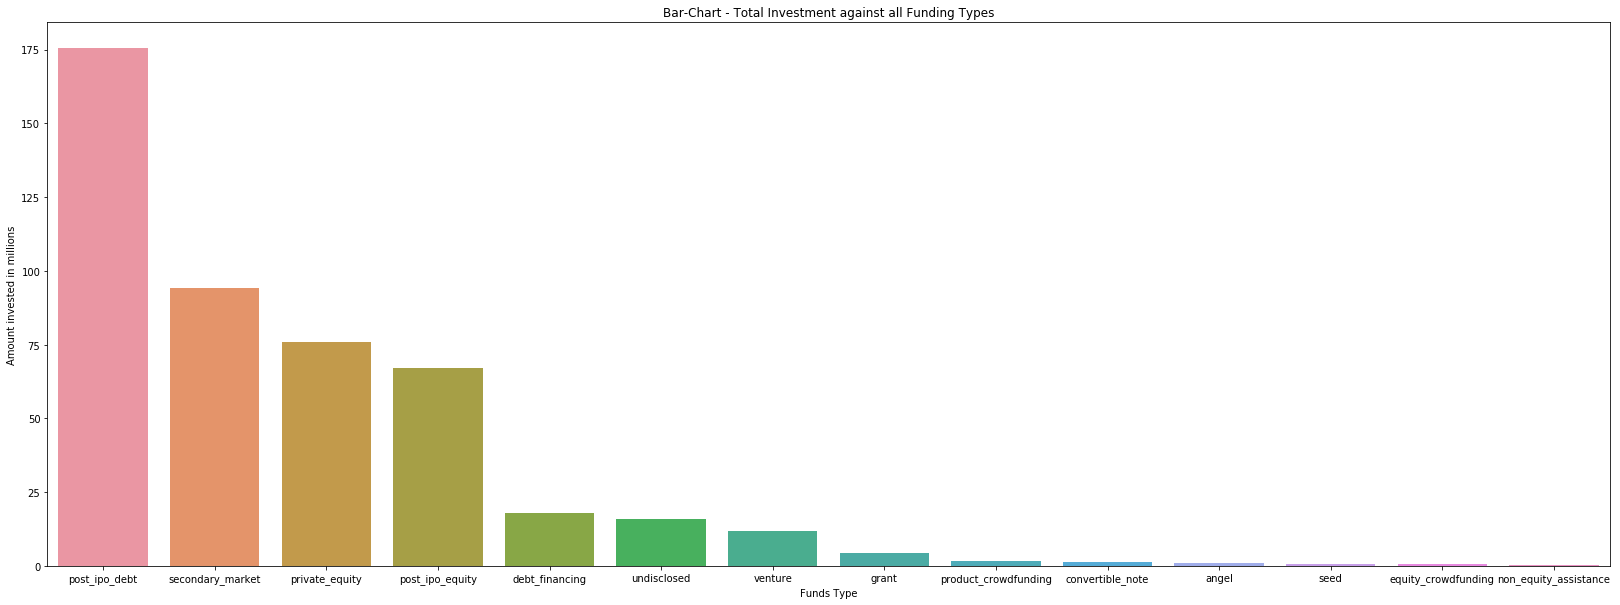

In [87]:
#We need to plot data for funding_round_type versus amount invested in each fund
#For this use master_frame_backup1 which has data of all the funding_round_type
#Note: master_frame now contains data only for VENTURE others are filtered. So use master_frame_backup1

groupedvalues=master_frame_backup1.groupby('funding_round_type',as_index=False)['raised_amount_in_millions'].mean().sort_values(by=['raised_amount_in_millions'],ascending=False)

#Plot the bar-chart
plt.figure(figsize=(28,10))
#Title
rank = groupedvalues["raised_amount_in_millions"].argsort().argsort() 
g=sns.barplot(x='funding_round_type',y='raised_amount_in_millions',data=groupedvalues)
plt.title('Bar-Chart - Total Investment against all Funding Types')
plt.xlabel('Funds Type')
plt.ylabel('Amount invested in millions')
plt.show()

<Figure size 1440x576 with 0 Axes>

Text(0.5, 1.0, 'Pie Chart - Total percentage wise Investment against all Funding Types')

<Figure size 1440x576 with 0 Axes>

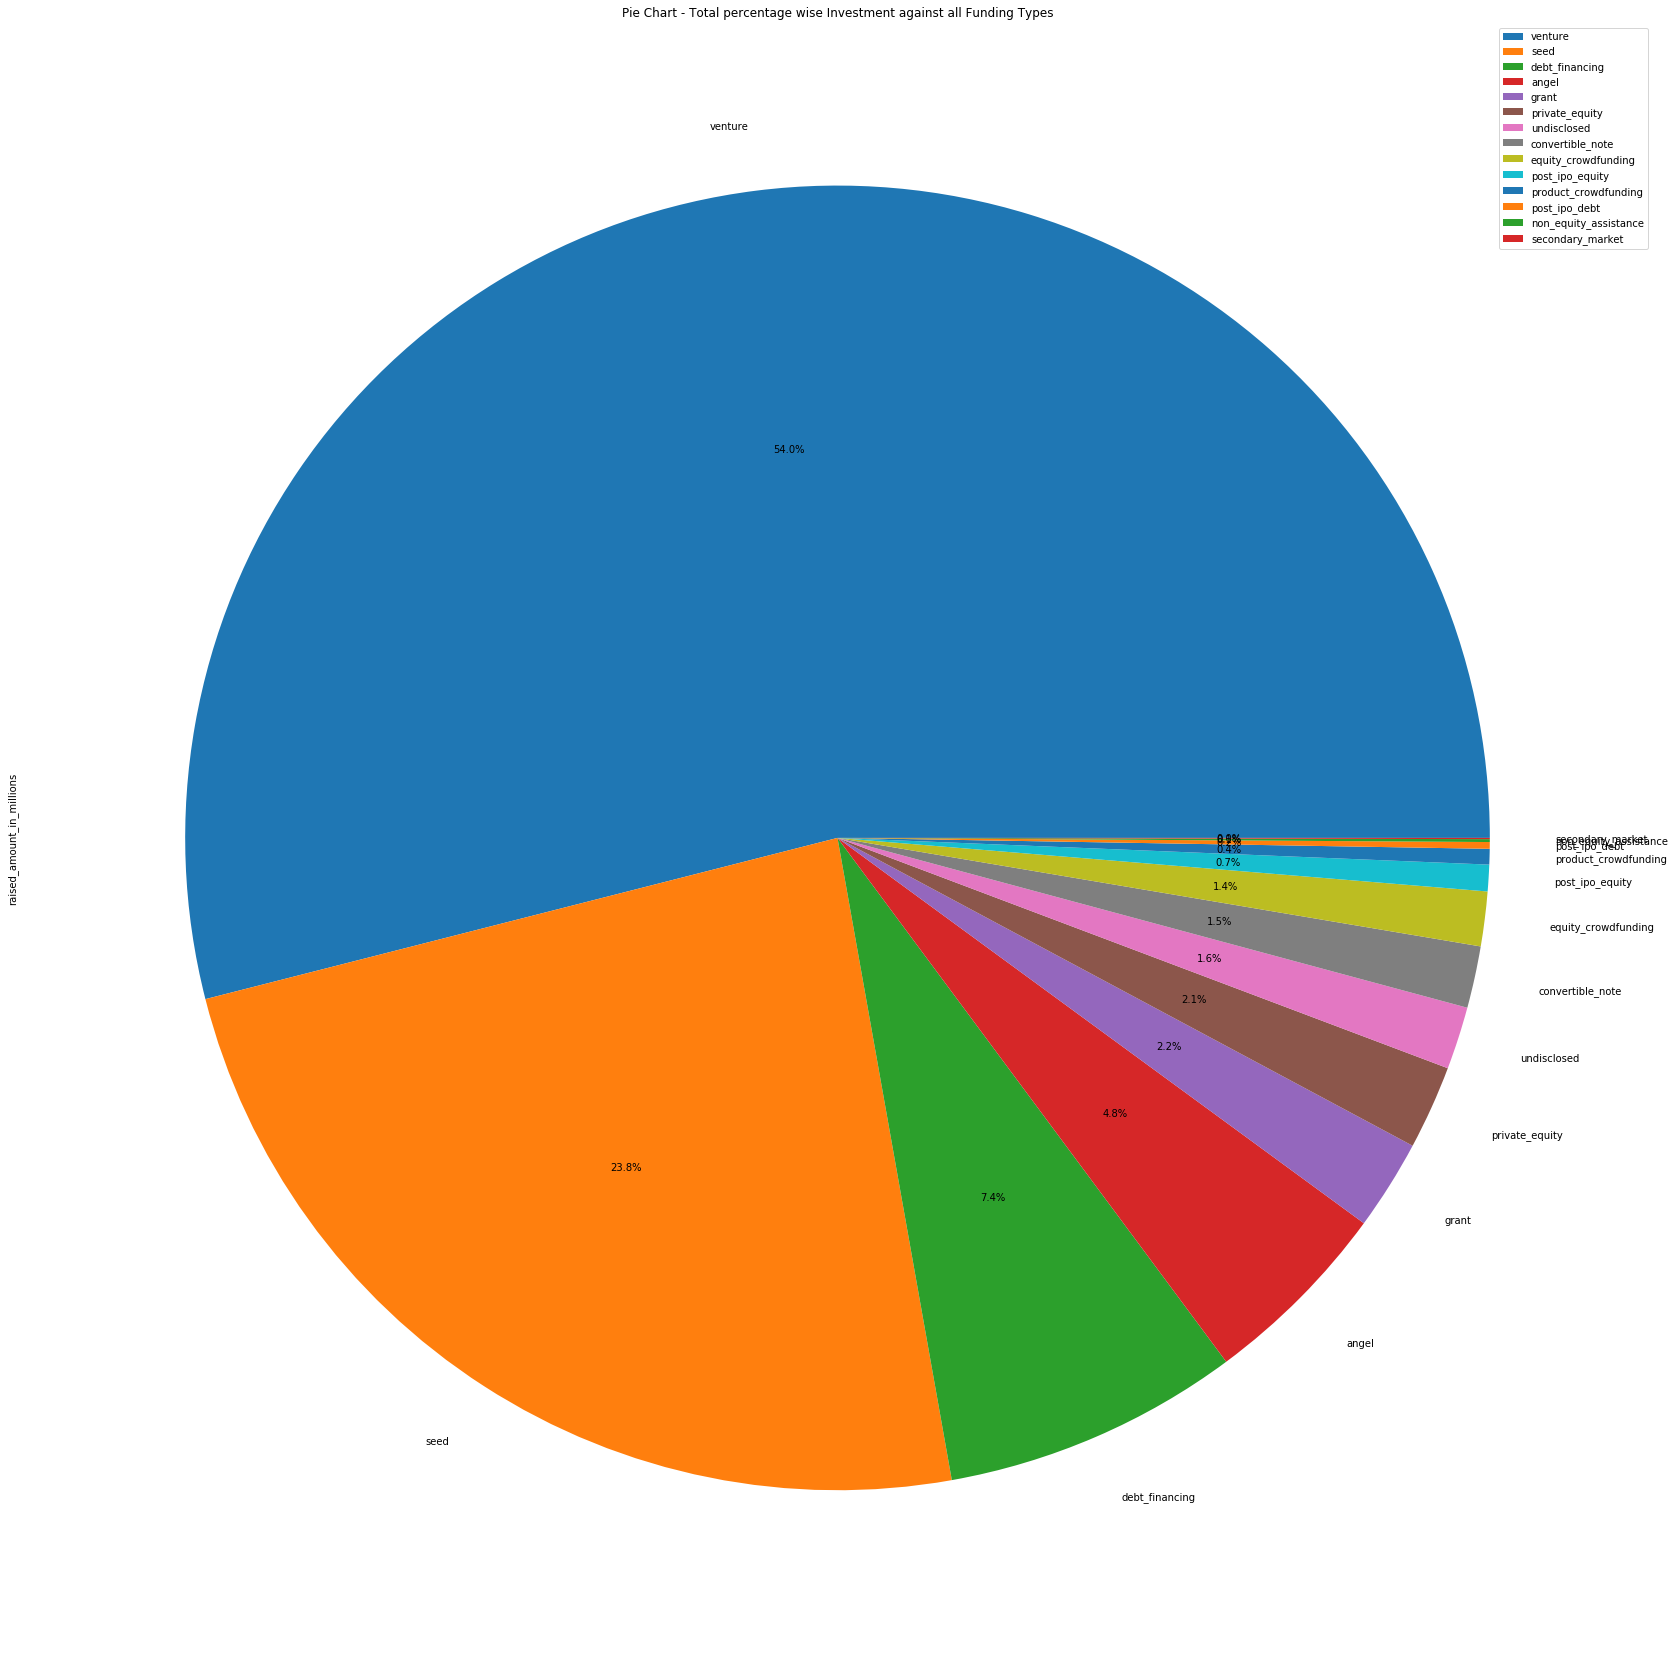

In [88]:
#Plot a pie chart showing the percentage of investment in all funds types
plt.figure(figsize=(20,8))
groupedvalues=master_frame_backup1.groupby('funding_round_type',as_index=False)['raised_amount_in_millions'].count().sort_values(by=['raised_amount_in_millions'],ascending=False)
groupedvalues.plot.pie(y='raised_amount_in_millions', labels=groupedvalues.funding_round_type,autopct='%1.1f%%',figsize=(30, 30))
plt.title('Pie Chart - Total percentage wise Investment against all Funding Types')
plt.show()

<Figure size 288x216 with 0 Axes>

Text(0.5, 1.0, 'Total Investment against Fund Types - Private Equity, Venture, Angel and Seed')

Text(0.5, 0, 'Funds Type')

Text(0, 0.5, 'Amount invested in millions')

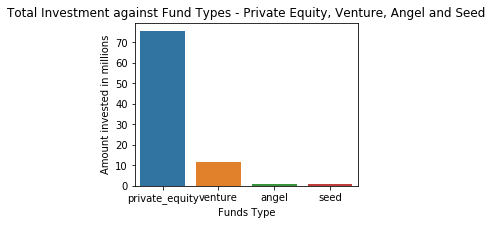

In [89]:
#Now we need the plot only against Funding Type - Private equity, venture,angel and seed
#So filter the data accordingly and then plot
MF1 = master_frame_backup1[master_frame_backup1['funding_round_type'].isin(['private_equity','venture','seed','angel'])]
groupedvalues1=MF1.groupby('funding_round_type',as_index=False)['raised_amount_in_millions'].mean().sort_values(by=['raised_amount_in_millions'],ascending=False)

plt.figure(figsize=(4,3))

rank = groupedvalues1["raised_amount_in_millions"].argsort().argsort() 

g=sns.barplot(x='funding_round_type',y='raised_amount_in_millions',data=groupedvalues1)

plt.title('Total Investment against Fund Types - Private Equity, Venture, Angel and Seed')
plt.xlabel('Funds Type')
plt.ylabel('Amount invested in millions')
plt.show()

2) A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

<Figure size 1080x576 with 0 Axes>

Text(0.5, 1.0, 'Total Investment based on Countries')

Text(0.5, 0, 'Name of Countries')

Text(0, 0.5, 'Amount invested in millions')

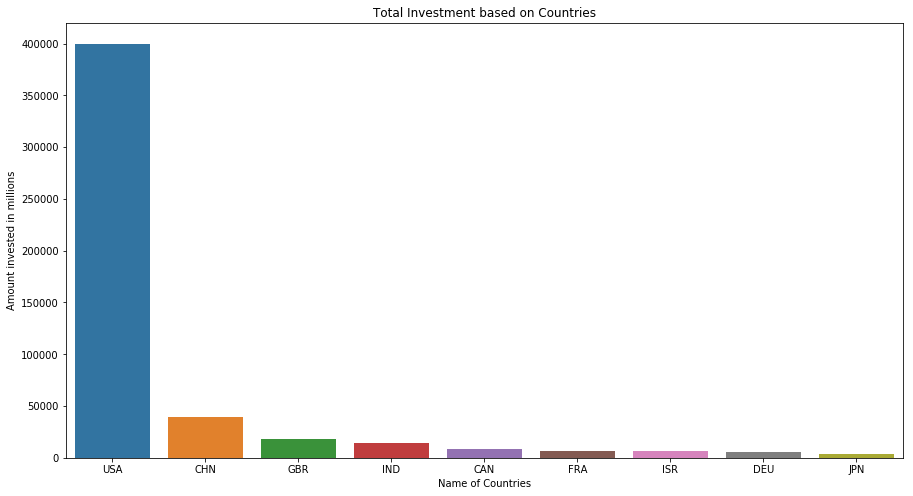

In [90]:
#Sort the country-wise data in descending order for amount invested
#Note: Here we are using the master_frame since it has filtered data based on fund - VENTURE
groupedvalues2 = master_frame.groupby('country_code',as_index=False)['raised_amount_in_millions'].sum().sort_values(by=['raised_amount_in_millions'],ascending=False).head(9)

#Plot the data
plt.figure(figsize=(15,8))

rank = groupedvalues2["raised_amount_in_millions"].argsort().argsort() 

g=sns.barplot(x='country_code',y='raised_amount_in_millions',data=groupedvalues2)

plt.title('Total Investment based on Countries')
plt.xlabel('Name of Countries')
plt.ylabel('Amount invested in millions')
plt.show()

3) A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). 

<Figure size 640x240 with 0 Axes>

Text(0.5, 1.0, 'Total Investment in top 3 sectors based on top 3 Countries')

Text(0.5, 0, 'Name of Countries')

Text(0, 0.5, 'Number of Investments')

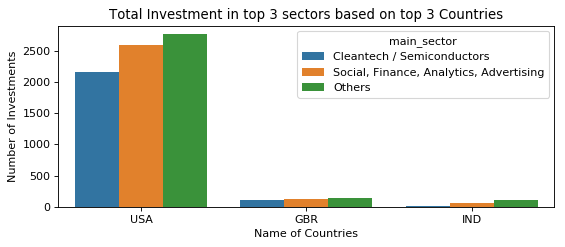

In [91]:
#D1,D2 and D3 datframes contain the data for top 3 countries respectively
#Use this data and filter out based on top 3 main_sectors found earlier
d1 = D1[D1['main_sector'].isin(['Others','Cleantech / Semiconductors','Social, Finance, Analytics, Advertising'])]
d2 = D2[D2['main_sector'].isin(['Others','Cleantech / Semiconductors','Social, Finance, Analytics, Advertising'])]
d3 = D3[D3['main_sector'].isin(['Others','Cleantech / Semiconductors','Social, Finance, Analytics, Advertising'])]

#Concatenate these 3 filtered dataframes
frames = [d1, d2, d3]
result = pd.concat(frames)

#Plot the data. The plotted data should be grouped based on investement done in each sector in the top 3 countries
#So x-axis will have country name
#y-axis will have amount invested
#And the data will be grouped using hue for main_sectors

plt.figure(num=None, figsize=(8, 3), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
sns.barplot(x='country_code', y='investment_count', hue="main_sector", data=result)

plt.title('Total Investment in top 3 sectors based on top 3 Countries')
plt.xlabel('Name of Countries')
plt.ylabel('Number of Investments')
plt.show()
